In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
price_df = pd.read_csv("data/train.csv")
price_df
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
price_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [162]:
price_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [163]:
price_df['Alley'] = price_df['Alley'].fillna('NoAlley')
Numerical_col = ["OverallQual", "GrLivArea", "GarageCars", "TotalBsmtSF", "FullBath", "YearBuilt"]

Categorical_num = ["Neighborhood", "ExterQual", "KitchenQual", "Foundation", "BsmtQual"]

In [164]:
## Lets drop the id column
price_df=price_df.drop(labels=['Id'],axis=1)
price_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NoAlley,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NoAlley,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NoAlley,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NoAlley,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NoAlley,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [165]:
## check for duplicated records
price_df.duplicated().sum()

np.int64(0)

In [166]:
numerical_columns=price_df.columns[price_df.dtypes!='object']
categorical_columns=price_df.columns[price_df.dtypes=='object']
print("Numerical columns:",numerical_columns)
print('Categorical Columns:',categorical_columns)

Numerical columns: Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
Categorical Columns: Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', '

In [167]:
Numerical_col = ["OverallQual", "GrLivArea", "GarageCars", "TotalBsmtSF", "FullBath", "YearBuilt"]

Categorical_col = ["Neighborhood", "ExterQual", "KitchenQual", "Foundation", "BsmtQual"]

In [168]:
price_df[Categorical_col].describe()

,Neighborhood,ExterQual,KitchenQual,Foundation,BsmtQual
count,1460,1460,1460,1460,1423
unique,25,4,4,6,4
top,NAmes,TA,TA,PConc,TA
freq,225,906,735,647,649


In [169]:
for col in Categorical_col:
    print(f"Value counts for {col}")
    print(price_df[col].value_counts())
    print("-"*40)

Value counts for Neighborhood
Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: count, dtype: int64
----------------------------------------
Value counts for ExterQual
ExterQual
TA    906
Gd    488
Ex     52
Fa     14
Name: count, dtype: int64
----------------------------------------
Value counts for KitchenQual
KitchenQual
TA    735
Gd    586
Ex    100
Fa     39
Name: count, dtype: int64
----------------------------------------
Value counts for Foundation
Foundation
PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: count, dtype: int64
----------------------------------------
Value counts for BsmtQual
BsmtQua

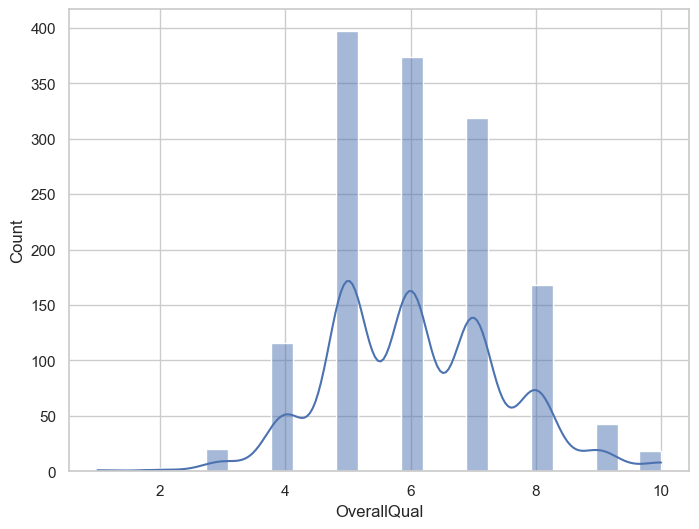

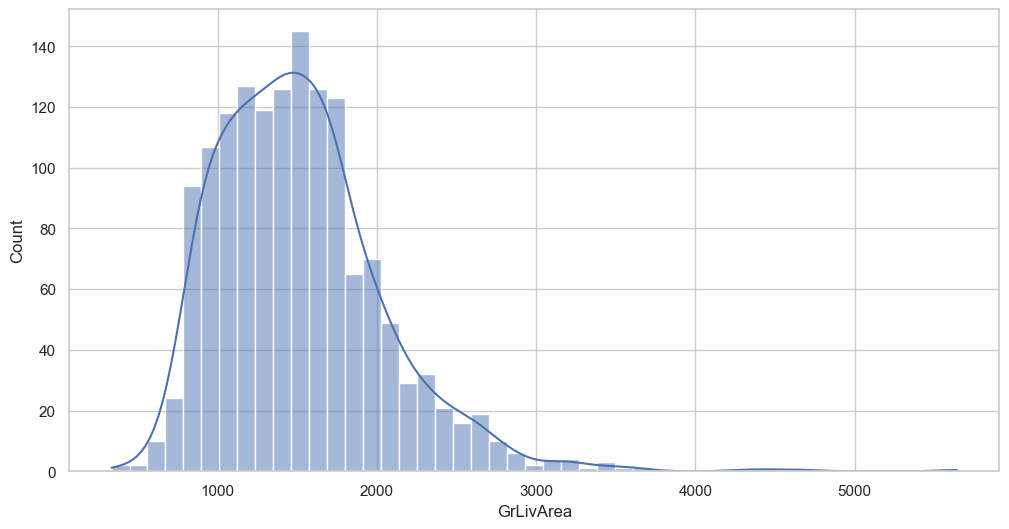

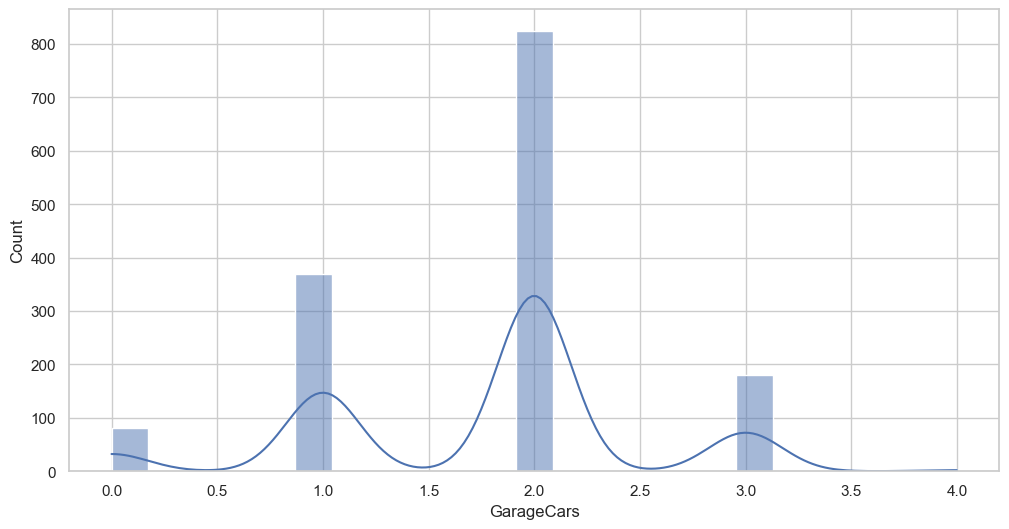

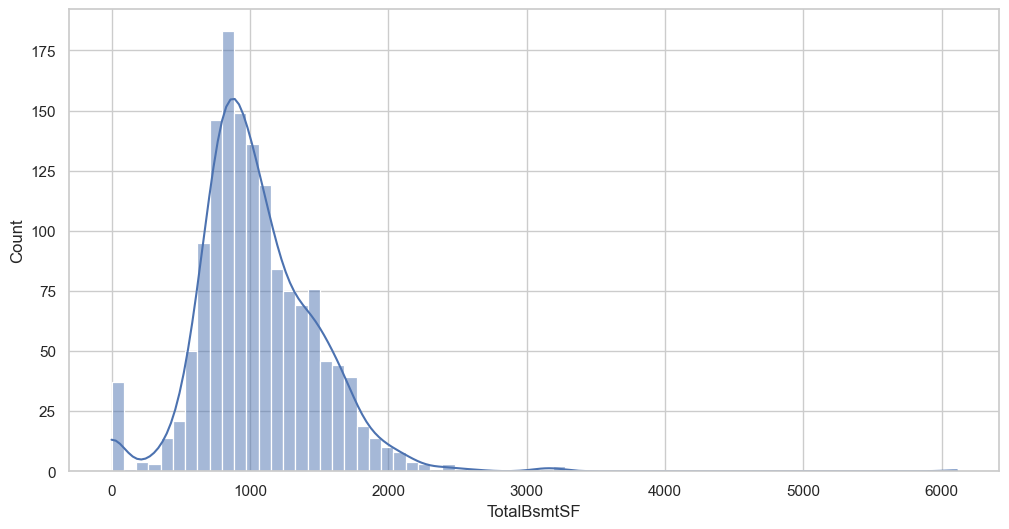

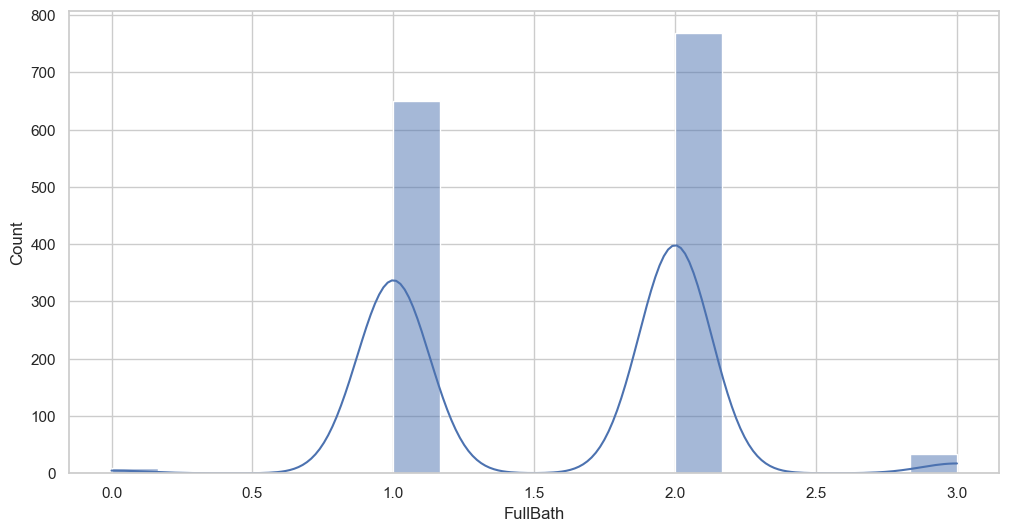

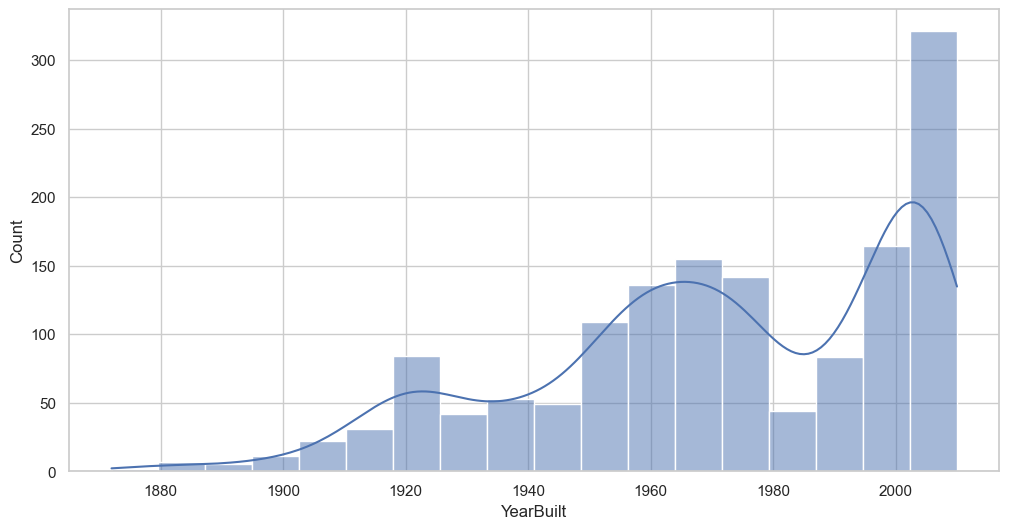

In [170]:
plt.figure(figsize=(8,6))
x=0
for i in Numerical_col:
    sns.histplot(data=price_df,x=i,kde=True)
    print('\n')
    plt.show()

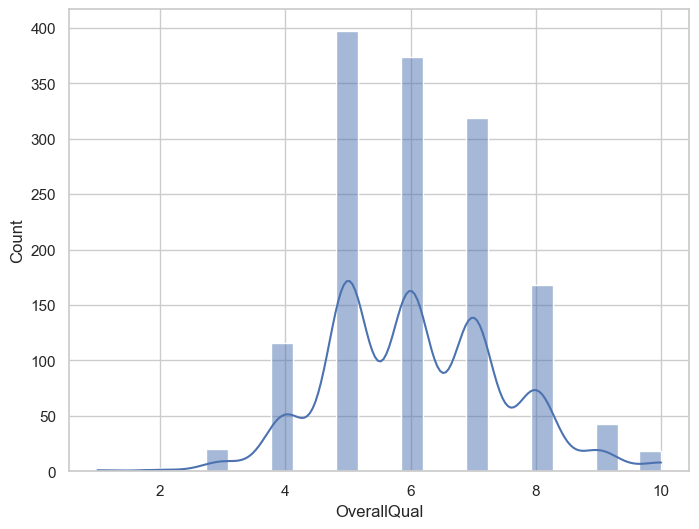

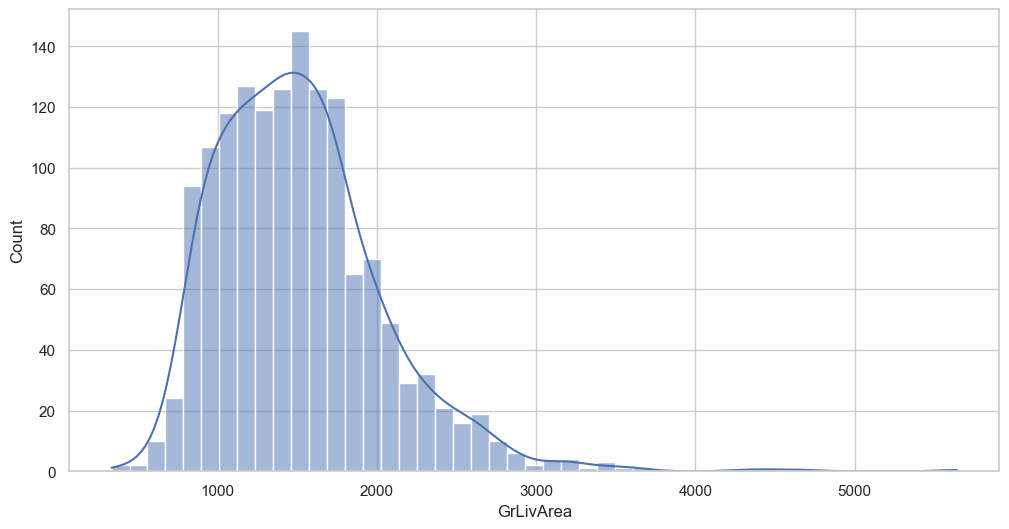

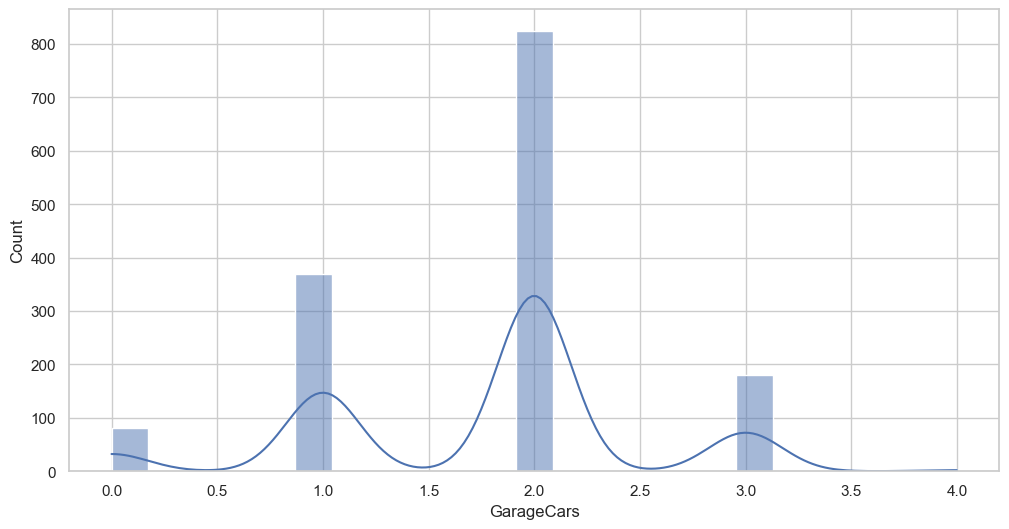

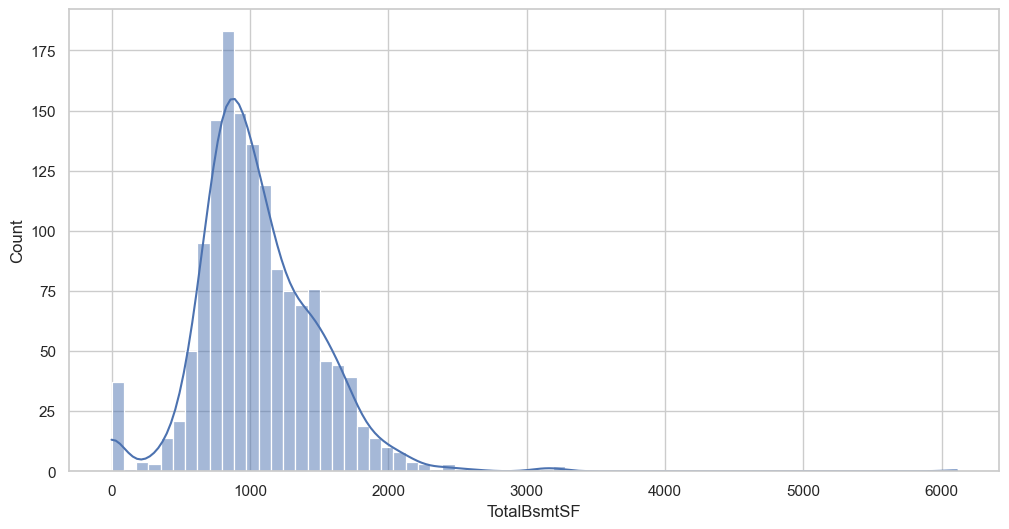

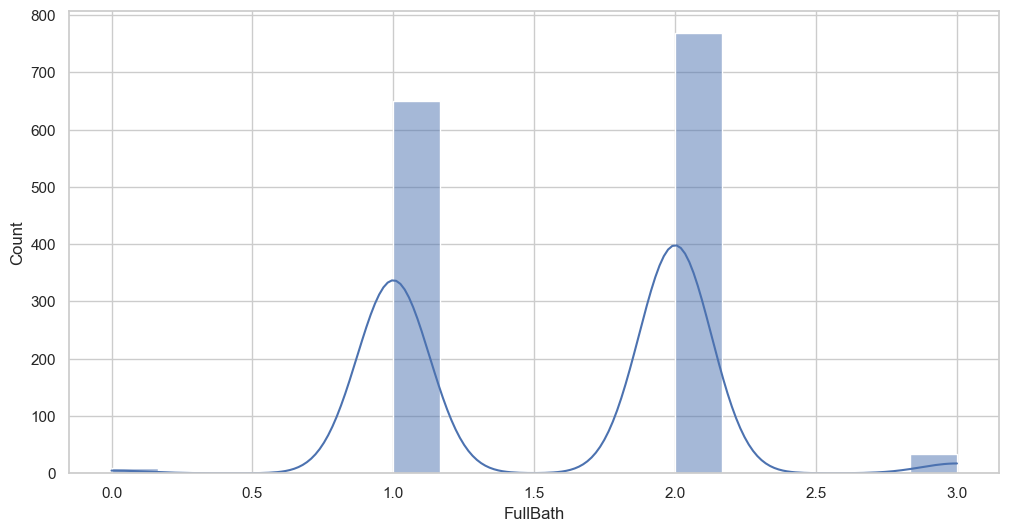

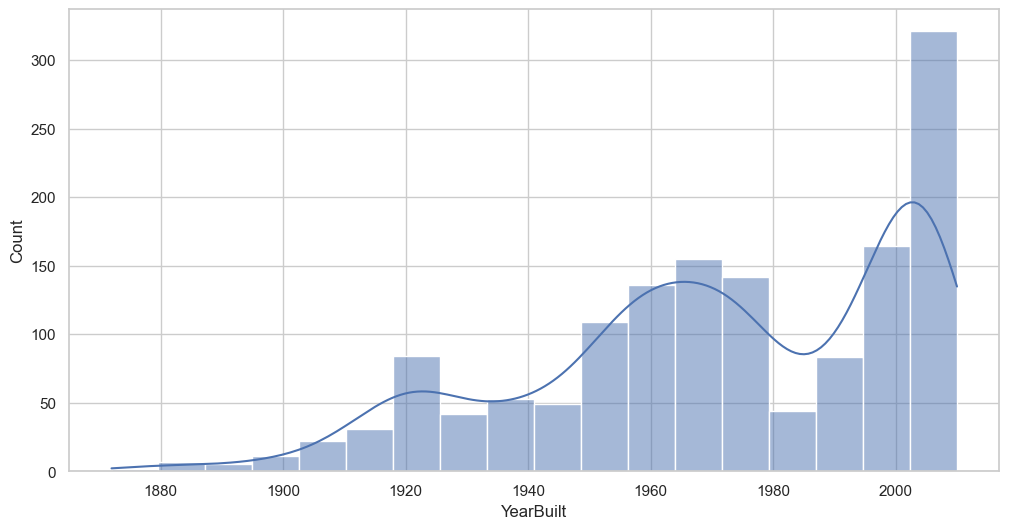

In [171]:
plt.figure(figsize=(8,6))
x=0
for i in Numerical_col:
    sns.histplot(data=price_df,x=i,kde=True)
    print('\n')
    plt.show()

<Axes: >

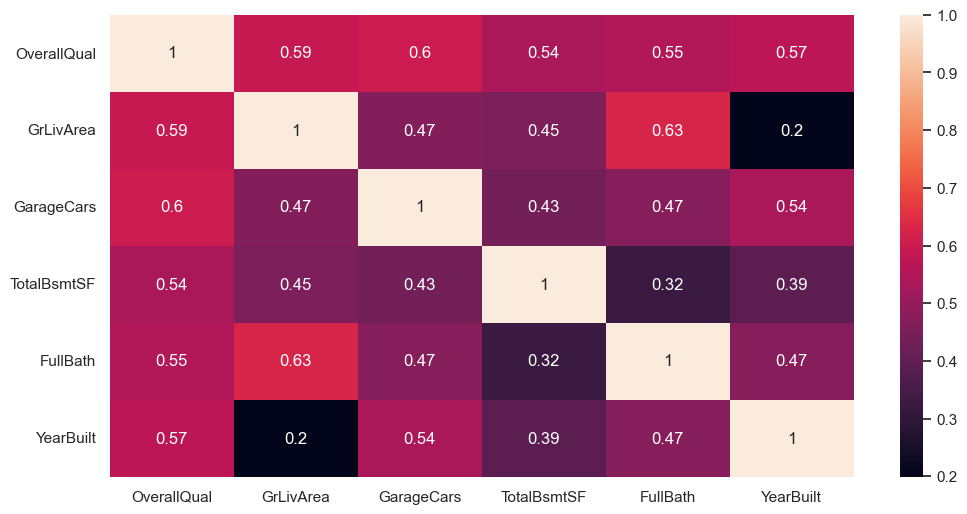

In [172]:
## correlation
sns.heatmap(price_df[Numerical_col].corr(),annot=True)

In [173]:
# Mean encoding for Neighborhood
neigh_mean = price_df.groupby('Neighborhood')['SalePrice'].mean()

price_df['Neighborhood_encoded'] = price_df['Neighborhood'].map(neigh_mean)
price_df['Neighborhood_encoded']

0       197965.773333
1       238772.727273
2       197965.773333
3       210624.725490
4       335295.317073
            ...      
1455    192854.506329
1456    189050.068493
1457    210624.725490
1458    145847.080000
1459    128219.700000
Name: Neighborhood_encoded, Length: 1460, dtype: float64

In [174]:
exterqual_map = {
    'Fa': 1,
    'TA': 2,
    'Gd': 3,
    'Ex': 4
}

price_df['ExterQual'] = price_df['ExterQual'].map(exterqual_map)

In [175]:
price_df['ExterQual']

0       3
1       2
2       3
3       2
4       3
       ..
1455    2
1456    2
1457    4
1458    2
1459    3
Name: ExterQual, Length: 1460, dtype: int64

In [176]:
kitchenqual_map = {
    'Fa': 1,
    'TA': 2,
    'Gd': 3,
    'Ex': 4
}

price_df['KitchenQual'] = price_df['KitchenQual'].map(kitchenqual_map)
price_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Neighborhood_encoded
0,60,RL,65.0,8450,Pave,NoAlley,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,197965.773333
1,20,RL,80.0,9600,Pave,NoAlley,Reg,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,238772.727273
2,60,RL,68.0,11250,Pave,NoAlley,IR1,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,197965.773333
3,70,RL,60.0,9550,Pave,NoAlley,IR1,Lvl,AllPub,Corner,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,210624.725490
4,60,RL,84.0,14260,Pave,NoAlley,IR1,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,335295.317073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NoAlley,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,8,2007,WD,Normal,175000,192854.506329
1456,20,RL,85.0,13175,Pave,NoAlley,Reg,Lvl,AllPub,Inside,...,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000,189050.068493
1457,70,RL,66.0,9042,Pave,NoAlley,Reg,Lvl,AllPub,Inside,...,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500,210624.725490
1458,20,RL,68.0,9717,Pave,NoAlley,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,4,2010,WD,Normal,142125,145847.080000


In [177]:
bsmtqual_map = {
    'Fa': 1,
    'TA': 2,
    'Gd': 3,
    'Ex': 4
}

price_df['BsmtQual'] = price_df['BsmtQual'].map(bsmtqual_map)
price_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Neighborhood_encoded
0,60,RL,65.0,8450,Pave,NoAlley,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,197965.773333
1,20,RL,80.0,9600,Pave,NoAlley,Reg,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,238772.727273
2,60,RL,68.0,11250,Pave,NoAlley,IR1,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,197965.773333
3,70,RL,60.0,9550,Pave,NoAlley,IR1,Lvl,AllPub,Corner,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,210624.725490
4,60,RL,84.0,14260,Pave,NoAlley,IR1,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,335295.317073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NoAlley,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,8,2007,WD,Normal,175000,192854.506329
1456,20,RL,85.0,13175,Pave,NoAlley,Reg,Lvl,AllPub,Inside,...,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000,189050.068493
1457,70,RL,66.0,9042,Pave,NoAlley,Reg,Lvl,AllPub,Inside,...,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500,210624.725490
1458,20,RL,68.0,9717,Pave,NoAlley,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,4,2010,WD,Normal,142125,145847.080000


In [178]:
foundation_map = {
    'Wood': 1,
    'Slab': 2,
    'BrkTil': 3,
    'CBlock': 4,
    'PConc': 5,
    'Stone': 6
}

price_df['Foundation'] = price_df['Foundation'].map(foundation_map)

In [179]:
price_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Neighborhood_encoded
0,60,RL,65.0,8450,Pave,NoAlley,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,197965.773333
1,20,RL,80.0,9600,Pave,NoAlley,Reg,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,238772.727273
2,60,RL,68.0,11250,Pave,NoAlley,IR1,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,197965.773333
3,70,RL,60.0,9550,Pave,NoAlley,IR1,Lvl,AllPub,Corner,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,210624.725490
4,60,RL,84.0,14260,Pave,NoAlley,IR1,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,335295.317073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NoAlley,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,8,2007,WD,Normal,175000,192854.506329
1456,20,RL,85.0,13175,Pave,NoAlley,Reg,Lvl,AllPub,Inside,...,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000,189050.068493
1457,70,RL,66.0,9042,Pave,NoAlley,Reg,Lvl,AllPub,Inside,...,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500,210624.725490
1458,20,RL,68.0,9717,Pave,NoAlley,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,4,2010,WD,Normal,142125,145847.080000


<Axes: >

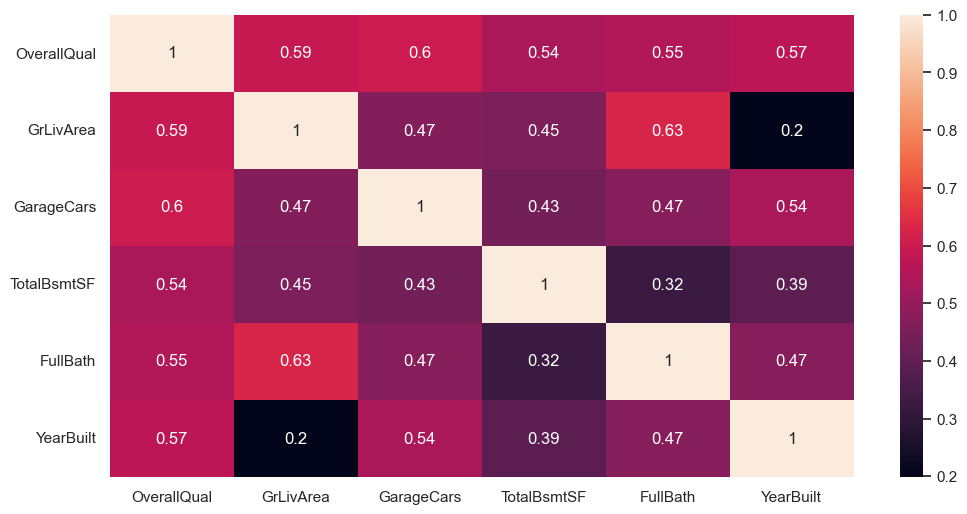

In [180]:
## correlation
sns.heatmap(price_df[Numerical_col].corr(),annot=True)

In [181]:
price_df[['GrLivArea','TotalBsmtSF','SalePrice']].skew()

GrLivArea      1.366560
TotalBsmtSF    1.524255
SalePrice      1.882876
dtype: float64

In [182]:
price_df['SalePrice'] = np.log1p(price_df['SalePrice'])
price_df['SalePrice']

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1455    12.072547
1456    12.254868
1457    12.493133
1458    11.864469
1459    11.901590
Name: SalePrice, Length: 1460, dtype: float64

In [183]:
# Skewness
price_df[['GrLivArea','TotalBsmtSF','SalePrice']].skew()

GrLivArea      1.366560
TotalBsmtSF    1.524255
SalePrice      0.121347
dtype: float64

In [184]:
price_df['GrLivArea_log'] = np.log1p(price_df['GrLivArea'])
price_df['TotalBsmtSF_log'] = np.log1p(price_df['TotalBsmtSF'])

In [185]:
price_df[['GrLivArea_log','TotalBsmtSF_log']].skew()

GrLivArea_log     -0.00614
TotalBsmtSF_log   -5.15467
dtype: float64

In [6]:
numerical_cols = ["OverallQual", "GrLivArea", "GarageCars"]

categorical_cols = [
    "Neighborhood",
    "ExterQual",
    "KitchenQual",
    "BsmtQual",
    "Foundation",
    "GarageFinish",
    "GarageType",
    "SaleCondition",
    "MSZoning",
    "HouseStyle"
]
target_col = "SalePrice"

In [8]:
price_df = price_df[numerical_cols + categorical_cols + [target_col]]

In [9]:
price_df

,OverallQual,GrLivArea,GarageCars,Neighborhood,ExterQual,KitchenQual,BsmtQual,Foundation,GarageFinish,GarageType,SaleCondition,MSZoning,HouseStyle,SalePrice
0,7,1710,2,CollgCr,Gd,Gd,Gd,PConc,RFn,Attchd,Normal,RL,2Story,208500
1,6,1262,2,Veenker,TA,TA,Gd,CBlock,RFn,Attchd,Normal,RL,1Story,181500
2,7,1786,2,CollgCr,Gd,Gd,Gd,PConc,RFn,Attchd,Normal,RL,2Story,223500
3,7,1717,3,Crawfor,TA,Gd,TA,BrkTil,Unf,Detchd,Abnorml,RL,2Story,140000
4,8,2198,3,NoRidge,Gd,Gd,Gd,PConc,RFn,Attchd,Normal,RL,2Story,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1647,2,Gilbert,TA,TA,Gd,PConc,RFn,Attchd,Normal,RL,2Story,175000
1456,6,2073,2,NWAmes,TA,TA,Gd,CBlock,Unf,Attchd,Normal,RL,1Story,210000
1457,7,2340,1,Crawfor,Ex,Gd,TA,Stone,RFn,Attchd,Normal,RL,2Story,266500
1458,5,1078,1,NAmes,TA,Gd,TA,CBlock,Unf,Attchd,Normal,RL,1Story,142125


In [20]:
os.makedirs("processed_data", exist_ok=True)
# Define file path
output_path = os.path.join("processed_data/", "preprocessed_house_data.csv")
# Save CSV
price_df.to_csv(output_path, index=False)

print(f"✅ File saved successfully at: {output_path}")

✅ File saved successfully at: processed_data/preprocessed_house_data.csv
